In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing

In [2]:
bitcoin_df = pd.read_csv('finaldataset.csv')
bitcoin_df = bitcoin_df.rename(columns={'Date': 'date_time','Open':'open','High':'high','Low':'low','Close':'close',
                                'Adj Close':'adj_close','Volume':'volume'})

bitcoin_df['date_time'] = pd.to_datetime(bitcoin_df['date_time'])
bitcoin_df.set_index('date_time', inplace=True)
bitcoin_df.head()

,open,high,low,close,adj_close,volume,fscore
date_time,,,,,,,
2017-09-13,235.242004,235.934998,229.332001,230.511993,230.511993,18478800.0,0.031334
2017-09-14,230.608994,232.440002,227.960999,230.643997,230.643997,20997800.0,0.730667
2017-09-15,230.492004,259.182007,229.822006,230.304001,230.304001,19177800.0,0.134369
2017-09-16,230.250000,231.214996,227.401993,229.091003,229.091003,20144200.0,0.741839
2017-09-17,229.076004,230.285004,228.925995,229.809998,229.809998,18935400.0,0.595322


In [3]:
bitcoin_df.columns

Index(['open', 'high', 'low', 'close', 'adj_close', 'volume', 'fscore'], dtype='object')

In [4]:
bitcoin_df.isnull().any()

open         False
high         False
low          False
close        False
adj_close    False
volume       False
fscore       False
dtype: bool

In [5]:
bitcoin_df = bitcoin_df.fillna(method = 'ffill')

<Axes: xlabel='date_time'>

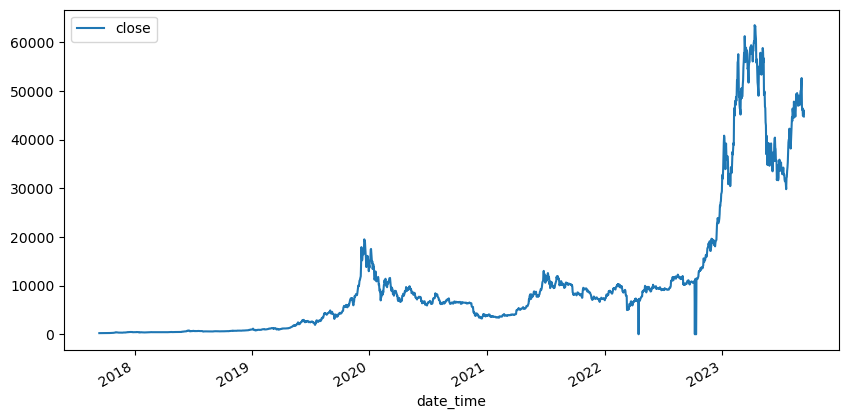

In [6]:
bitcoin_df_plot=bitcoin_df.loc[:,['close']]
bitcoin_df_plot.plot(subplots=False, figsize=(10,5))

<Axes: xlabel='date_time'>

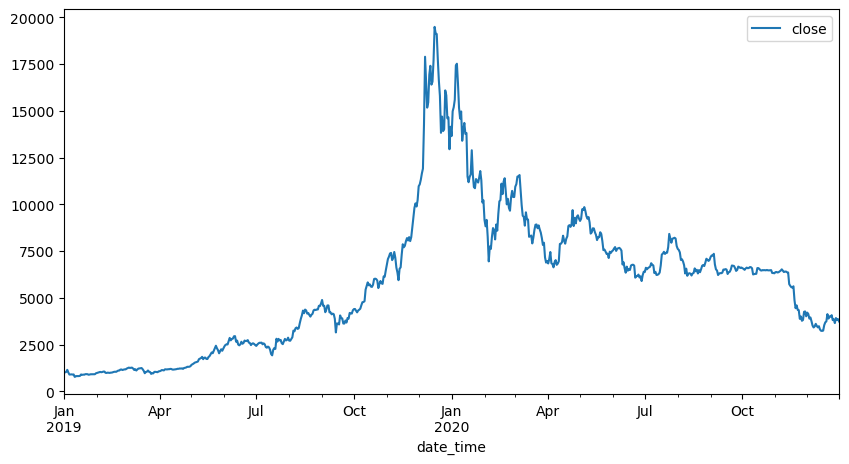

In [7]:
bitcoin_df_plot['2019':'2020'].resample('D').fillna(method='pad').plot(subplots=False, figsize=(10,5))

In [8]:

bitcoin_x=bitcoin_df[['close','open', 'high', 'low',  'adj_close', 'volume','fscore']]
test_split=round(len(bitcoin_x)*0.80)
test_split

1754

In [9]:
bitcoin_x

,close,open,high,low,adj_close,volume,fscore
date_time,,,,,,,
2017-09-13,230.511993,235.242004,235.934998,229.332001,230.511993,1.847880e+07,0.031334
2017-09-14,230.643997,230.608994,232.440002,227.960999,230.643997,2.099780e+07,0.730667
2017-09-15,230.304001,230.492004,259.182007,229.822006,230.304001,1.917780e+07,0.134369
2017-09-16,229.091003,230.250000,231.214996,227.401993,229.091003,2.014420e+07,0.741839
2017-09-17,229.809998,229.076004,230.285004,228.925995,229.809998,1.893540e+07,0.595322
...,...,...,...,...,...,...,...
2023-09-09,46391.421875,45774.742188,47261.949219,45669.738281,46391.421875,3.867266e+10,0.264020
2023-09-10,44883.910156,46396.664063,47031.742188,44344.484375,44883.910156,3.915467e+10,0.849678
2023-09-11,45201.457031,44869.839844,45969.292969,44818.265625,45201.457031,3.449984e+10,0.482703


In [10]:
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1]
    df = pd.DataFrame(data)
    cols, names = list(), list()
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
    agg = pd.concat(cols, axis=1)
    agg.columns = names
    if dropnan:
        agg.dropna(inplace=True)
    return agg
values = bitcoin_x.values
print(values.shape)
values = values.astype('float32')
reframed = series_to_supervised(values,1,1)
reframed

(2193, 7)


,var1(t-1),var2(t-1),var3(t-1),var4(t-1),var5(t-1),var6(t-1),var7(t-1),var1(t),var2(t),var3(t),var4(t),var5(t),var6(t),var7(t)
1,230.511993,235.242004,235.934998,229.332001,230.511993,1.847880e+07,0.031334,230.643997,230.608994,232.440002,227.960999,230.643997,2.099780e+07,0.730667
2,230.643997,230.608994,232.440002,227.960999,230.643997,2.099780e+07,0.730667,230.304001,230.492004,259.182007,229.822006,230.304001,1.917780e+07,0.134369
3,230.304001,230.492004,259.182007,229.822006,230.304001,1.917780e+07,0.134369,229.091003,230.250000,231.214996,227.401993,229.091003,2.014420e+07,0.741839
4,229.091003,230.250000,231.214996,227.401993,229.091003,2.014420e+07,0.741839,229.809998,229.076004,230.285004,228.925995,229.809998,1.893540e+07,0.595322
5,229.809998,229.076004,230.285004,228.925995,229.809998,1.893540e+07,0.595322,232.975006,233.520996,234.352997,232.184998,232.975006,2.024220e+07,0.473483
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2188,46091.390625,46827.761719,47334.054688,44561.394531,46091.390625,4.900776e+10,0.413202,46391.421875,45774.742188,47261.949219,45669.738281,46391.421875,3.867266e+10,0.264020
2189,46391.421875,45774.742188,47261.949219,45669.738281,46391.421875,3.867266e+10,0.264020,44883.910156,46396.664062,47031.742188,44344.484375,44883.910156,3.915467e+10,0.849678
2190,44883.910156,46396.664062,47031.742188,44344.484375,44883.910156,3.915467e+10,0.849678,45201.457031,44869.839844,45969.292969,44818.265625,45201.457031,3.449983e+10,0.482703
2191,45201.457031,44869.839844,45969.292969,44818.265625,45201.457031,3.449983e+10,0.482703,46063.269531,45206.628906,46364.878906,44790.460938,46063.269531,2.788198e+10,0.764662


In [11]:
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.callbacks import EarlyStopping
from keras.layers import Dense,LSTM,GRU
scaler = MinMaxScaler(feature_range=(0,1))
scaled = scaler.fit_transform(values)
reframed = series_to_supervised(scaled,1,1)
reframed.drop(reframed.columns[[8,9,10,11,12,13]], axis=1, inplace=True)
reframed.head()

,var1(t-1),var2(t-1),var3(t-1),var4(t-1),var5(t-1),var6(t-1),var7(t-1),var1(t)
1,0.003625,0.003696,0.003626,0.003684,0.003624,0.000053,0.091033,0.003627
2,0.003627,0.003623,0.003572,0.003662,0.003626,0.000060,0.747445,0.003622
3,0.003622,0.003622,0.003985,0.003692,0.003620,0.000055,0.187745,0.003603
4,0.003603,0.003618,0.003554,0.003653,0.003601,0.000057,0.757932,0.003614
5,0.003614,0.003599,0.003539,0.003678,0.003613,0.000054,0.620407,0.003664


In [12]:
values = reframed.values
train = values[:test_split]
test = values[test_split:]
trainX,trainY = train[:,:-1],train[:,-1]
testX,testY = test[:,:-1],test[:,-1]

In [13]:
trainX = trainX.reshape(trainX.shape[0],1,trainX.shape[1])
testX = testX.reshape(testX.shape[0],1,testX.shape[1])
print(trainX.shape)
print(testX.shape)

(1754, 1, 7)
(438, 1, 7)


In [14]:
print(trainX.shape,trainY.shape,testX.shape,testY.shape)

(1754, 1, 7) (1754,) (438, 1, 7) (438,)


In [21]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Bidirectional
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dropout, Flatten
model = Sequential()
model.add(Bidirectional(LSTM(12, activation='tanh', input_shape=(trainX.shape[1], trainX.shape[2]),return_sequences=True)))                        
model.add(Bidirectional(LSTM(32, activation='tanh', return_sequences=True)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

Epoch 1/30
9/9 [==============================] - 12s 9ms/step - loss: 0.0071
Epoch 2/30
9/9 [==============================] - 0s 10ms/step - loss: 0.0038
Epoch 3/30
9/9 [==============================] - 0s 10ms/step - loss: 0.0035
Epoch 4/30
9/9 [==============================] - 0s 10ms/step - loss: 0.0030
Epoch 5/30
9/9 [==============================] - 0s 10ms/step - loss: 0.0023
Epoch 6/30
9/9 [==============================] - 0s 10ms/step - loss: 0.0015
Epoch 7/30
9/9 [==============================] - 0s 11ms/step - loss: 5.9073e-04
Epoch 8/30
9/9 [==============================] - 0s 10ms/step - loss: 1.8235e-04
Epoch 9/30
9/9 [==============================] - 0s 11ms/step - loss: 1.6267e-04
Epoch 10/30
9/9 [==============================] - 0s 11ms/step - loss: 1.4838e-04
Epoch 11/30
9/9 [==============================] - 0s 11ms/step - loss: 1.2250e-04
Epoch 12/30
9/9 [==============================] - 0s 11ms/step - loss: 1.1075e-04
Epoch 13/30
9/9 [====================

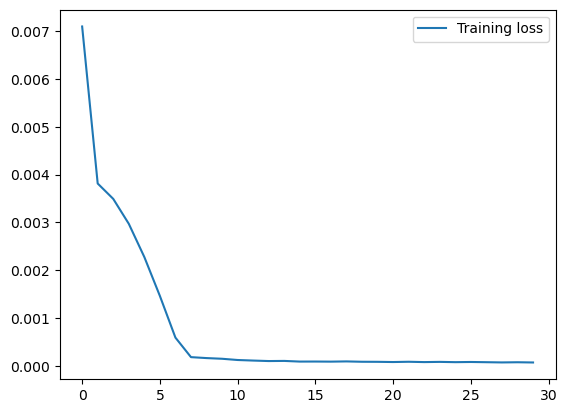

In [22]:
history = model.fit(trainX, trainY, epochs=30, batch_size=200,verbose=1)
plt.plot(history.history['loss'], label='Training loss')
plt.legend()

In [23]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional_5 (Bidirectio  (None, 1, 24)            1920      
 nal)                                                            
                                                                 
 bidirectional_6 (Bidirectio  (None, 1, 64)            14592     
 nal)                                                            
                                                                 
 dropout_4 (Dropout)         (None, 1, 64)             0         
                                                                 
 flatten_4 (Flatten)         (None, 64)                0         
                                                                 
 dense_12 (Dense)            (None, 64)                4160      
                                                                 
 dense_13 (Dense)            (None, 8)                

In [24]:

model.save("BILSTM.h5")

In [26]:
predicted = model.predict(testX)

14/14 [==============================] - 0s 3ms/step


In [27]:
prediction_copies_array = np.repeat(predicted,7, axis=-1)
pred=scaler.inverse_transform(np.reshape(prediction_copies_array,(len(predicted),7)))[:,0]
prediction_copies_array


array([[0.14275706, 0.14275706, 0.14275706, ..., 0.14275706, 0.14275706,
        0.14275706],
       [0.14183185, 0.14183185, 0.14183185, ..., 0.14183185, 0.14183185,
        0.14183185],
       [0.14227419, 0.14227419, 0.14227419, ..., 0.14227419, 0.14227419,
        0.14227419],
       ...,
       [0.5837813 , 0.5837813 , 0.5837813 , ..., 0.5837813 , 0.5837813 ,
        0.5837813 ],
       [0.5667988 , 0.5667988 , 0.5667988 , ..., 0.5667988 , 0.5667988 ,
        0.5667988 ],
       [0.5818518 , 0.5818518 , 0.5818518 , ..., 0.5818518 , 0.5818518 ,
        0.5818518 ]], dtype=float32)

In [28]:
pred

array([ 9065.837  ,  9007.083  ,  9035.174  ,  9002.958  ,  9186.817  ,
        9189.244  ,  9290.555  ,  9256.21   ,  9181.049  ,  9140.411  ,
        9186.918  ,  9163.157  ,  9170.037  ,  9165.476  ,  9092.24   ,
        9053.316  ,  9094.709  ,  9093.65   ,  9095.4    ,  9209.812  ,
        9361.939  ,  9466.036  ,  9453.564  ,  9548.383  ,  9724.195  ,
       10488.856  , 10770.755  , 10910.505  , 10874.227  , 11066.085  ,
       11351.934  , 11241.314  , 10995.723  , 11046.917  , 11329.431  ,
       11575.351  , 11424.099  , 11410.443  , 11436.941  , 11556.966  ,
       11427.916  , 11366.688  , 11440.548  , 11603.66   , 11610.225  ,
       11633.435  , 11829.52   , 11879.604  , 11618.235  , 11539.095  ,
       11503.595  , 11357.073  , 11399.643  , 11490.539  , 11316.529  ,
       11200.818  , 11170.952  , 11223.577  , 11283.34   , 11406.161  ,
       11471.992  , 11630.081  , 11437.19   , 10666.923  , 10306.499  ,
       10272.702  , 10154.689  , 10167.292  , 10131.388  , 10102

In [29]:
original_copies_array = np.repeat(testY,7, axis=-1)

original_copies_array.shape

original=scaler.inverse_transform(np.reshape(original_copies_array,(len(testY),7)))[:,0]
original

array([9.08730371e+03, 9.13248828e+03, 9.07394238e+03, 9.37547461e+03,
       9.25227734e+03, 9.42833301e+03, 9.27796777e+03, 9.27880762e+03,
       9.24034668e+03, 9.27650000e+03, 9.24361426e+03, 9.24321387e+03,
       9.19283691e+03, 9.13222754e+03, 9.15139258e+03, 9.15904004e+03,
       9.18581738e+03, 9.16423145e+03, 9.37488770e+03, 9.52536328e+03,
       9.58107227e+03, 9.53689258e+03, 9.67711328e+03, 9.90516699e+03,
       1.09908730e+04, 1.09128232e+04, 1.11004678e+04, 1.11112139e+04,
       1.13234668e+04, 1.17595928e+04, 1.10536143e+04, 1.12463486e+04,
       1.12058926e+04, 1.17470225e+04, 1.17797734e+04, 1.16014727e+04,
       1.17540459e+04, 1.16757393e+04, 1.18781113e+04, 1.14105254e+04,
       1.15849346e+04, 1.17841377e+04, 1.17688711e+04, 1.18656982e+04,
       1.18928037e+04, 1.22544023e+04, 1.19912334e+04, 1.17582832e+04,
       1.18783721e+04, 1.15924893e+04, 1.16818252e+04, 1.16648477e+04,
       1.17745957e+04, 1.13661348e+04, 1.14883633e+04, 1.13233975e+04,
      

In [30]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
predictioninfo = model.predict(testX)
print("MSE",mean_squared_error(testY, predictioninfo))
from math import sqrt
from sklearn.metrics import mean_absolute_error
print("RMSE",sqrt(mean_squared_error(testY, predictioninfo)))
print("MAE",sqrt(mean_absolute_error(testY, predictioninfo)))

14/14 [==============================] - 0s 3ms/step
MSE 0.01808668
RMSE 0.13448672529214262
MAE 0.31645847407612654


In [31]:
Testingdata=bitcoin_x[test_split:]
Testingdata

,close,open,high,low,adj_close,volume,fscore
date_time,,,,,,,
2022-07-02,9123.410156,9231.139648,9274.962891,9036.623047,9123.410156,1.633892e+10,0.027877
2022-07-03,9087.303711,9124.842773,9202.344727,9058.794922,9087.303711,1.307897e+10,0.028370
2022-07-04,9132.488281,9084.233398,9183.295898,9053.629883,9132.488281,1.229053e+10,0.143652
2022-07-05,9073.942383,9126.090820,9162.183594,8977.015625,9073.942383,1.290341e+10,0.118508
2022-07-06,9375.474609,9072.849609,9375.474609,9058.664063,9375.474609,1.788926e+10,0.150056
...,...,...,...,...,...,...,...
2023-09-09,46391.421875,45774.742188,47261.949219,45669.738281,46391.421875,3.867266e+10,0.264020
2023-09-10,44883.910156,46396.664063,47031.742188,44344.484375,44883.910156,3.915467e+10,0.849678
2023-09-11,45201.457031,44869.839844,45969.292969,44818.265625,45201.457031,3.449984e+10,0.482703


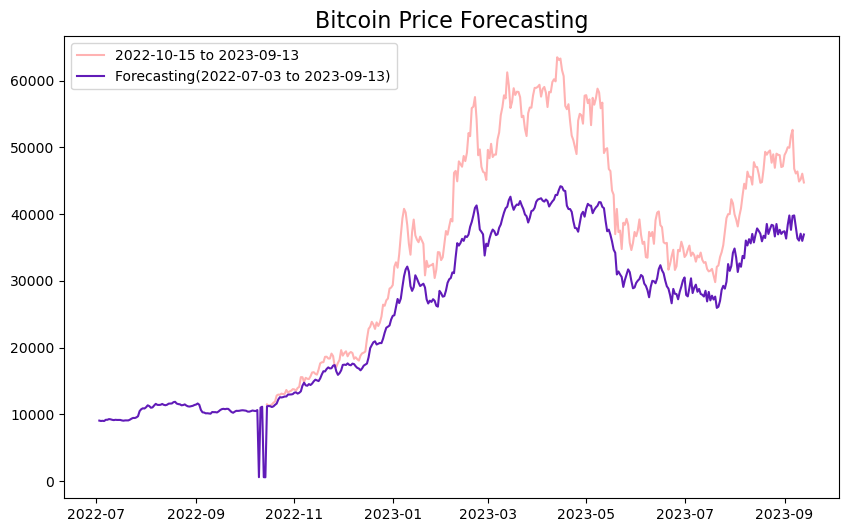

In [32]:
plt.figure(figsize=(10,6))
plt.plot(Testingdata['2022-10-15':'2023-09-13']['close'].index, pd.DataFrame(Testingdata['2022-10-15':'2023-09-13']['close']), color = 'red', alpha = 0.3, label='2022-10-15 to 2023-09-13')
plt.plot(bitcoin_x['2022-07-03':'2023-09-13'].index, pred[-438:], color = '#611BB8', label='Forecasting(2022-07-03 to 2023-09-13)')
plt.title(label = 'Bitcoin Price Forecasting', fontsize=16)
plt.legend()
plt.show();